In [1]:
from DataManagement.data_manager import DataManager
from DataManagement.coin_data import CoinData
from transfer_entropy_functions import *
from constants import ATR_ABNORMALITY_COLUMN
# libs
import pandas as pd
import numpy as np

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (70,30)

coin_symbol_list = ["BTCUSDT", "ETHUSDT", "ADAUSDT", "LTCUSDT"]
feature = "close"
main_coin_symbol = "BTCUSDT"
font_scale = 3
candle_size = "1d"


In [2]:
data_manager = DataManager()
        # self.transfer_entropy = TransferEntropy(lookback=transfer_entropy_lookback, window_size=num_samples)

main_1d_df = data_manager.get_historical_data_CoinData(main_coin_symbol, kline_size="1d").df
coin_data_list = [data_manager.get_historical_data_CoinData(coin_symbol, kline_size="1m") for coin_symbol in coin_symbol_list]
main_1h_df = data_manager.get_historical_data_CoinData(main_coin_symbol, kline_size="1h").df
main_df = main_1d_df
# main_abnormal_timestamp_list = main_df[main_df[ATR_ABNORMALITY_COLUMN] == 1].index

In [ ]:
raw_df = join_dataframes(coin_data_list=coin_data_list, feature='hloc')

In [ ]:
abnormal_index = main_df[main_df[ATR_ABNORMALITY_COLUMN] == 1].resample('1min').asfreq().index

In [ ]:
raw_df

,hloc_BTCUSDT,hloc_ETHUSDT,hloc_ADAUSDT,hloc_LTCUSDT
timestamp,,,,
2018-04-17 04:02:00,8032.2675,507.4825,0.262755,130.3775
2018-04-17 04:03:00,8029.5825,507.7750,0.265520,130.3475
2018-04-17 04:04:00,8031.9825,507.5625,0.264090,130.2375
2018-04-17 04:05:00,8030.2575,507.5750,0.266665,130.2000
2018-04-17 04:06:00,8030.3975,507.4225,0.268657,130.1900
...,...,...,...,...
2021-06-30 10:39:00,34821.2175,2136.3725,1.337850,140.7850
2021-06-30 10:40:00,34806.3500,2135.0400,1.337325,140.6150
2021-06-30 10:41:00,34757.6175,2132.1900,1.336250,140.3800


In [ ]:
intersection_index = raw_df.index.intersection(abnormal_index)

In [ ]:
abnormal_raw_df = raw_df.loc[intersection_index]

In [ ]:
L = 1

In [ ]:
alltime_result = get_transfer_entropy_matrix_wrapper(raw_df, L=L, is_divide_by_joint_entropy = True)

TypeError: get_transfer_entropy_matrix_wrapper() got an unexpected keyword argument 'is_divide_by_joint_entropy'

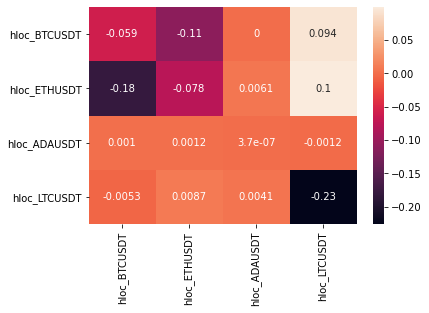

In [ ]:
sn.heatmap(alltime_result, annot=True);

In [ ]:
abnormal_result = get_transfer_entropy_matrix_wrapper(abnormal_raw_df,L=L)

4it [00:38,  9.71s/it]


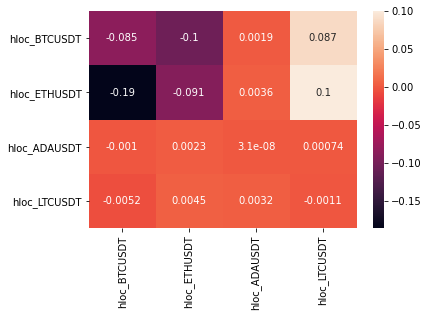

In [ ]:
sn.heatmap(abnormal_result, annot=True);

In [ ]:
abnormal_result - alltime_result

,hloc_BTCUSDT,hloc_ETHUSDT,hloc_ADAUSDT,hloc_LTCUSDT
hloc_BTCUSDT,-0.026668,0.007186,1.865896e-03,-0.006823
hloc_ETHUSDT,-0.005730,-0.012507,-2.481574e-03,0.000628
hloc_ADAUSDT,-0.002071,0.001091,-3.424409e-07,0.001900
hloc_LTCUSDT,0.000111,-0.004204,-8.135901e-04,0.225343
